## 1. 활성화 함수

#### 1) 활성화 함수란?

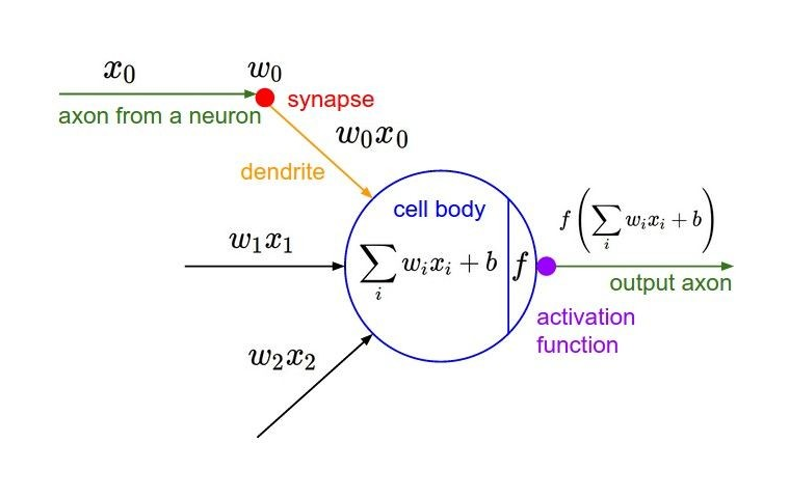

* 뉴럴 네트워크에서는 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고 활성화 함수(Activation Function) 를 통과시킨 후에 전달  
* 언더피팅의 문제를 개선  
* 활성화 함수는 특정 featur에 대해 이 정보를 얼마나 활성화할 것인지를 할 결정하는 역할  
* 활성화 함수로 비선형 함수를 사용 -> non-linearity 제공  

#### 2) 활성화 함수의 종류

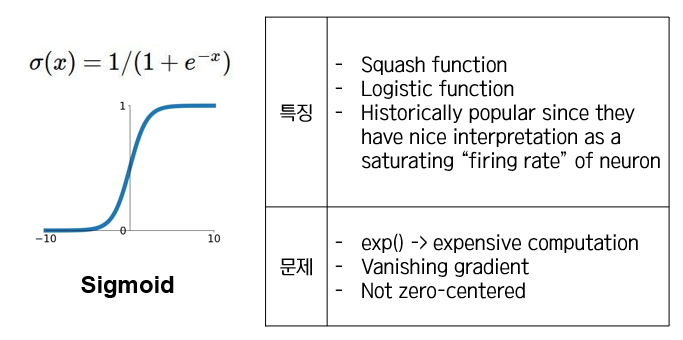

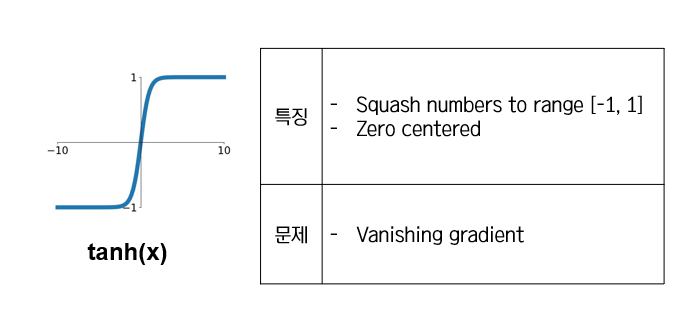

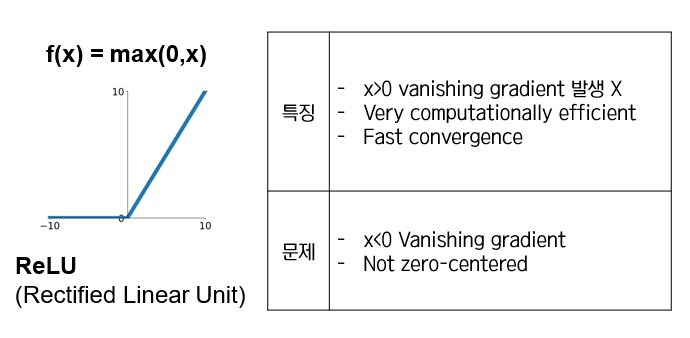

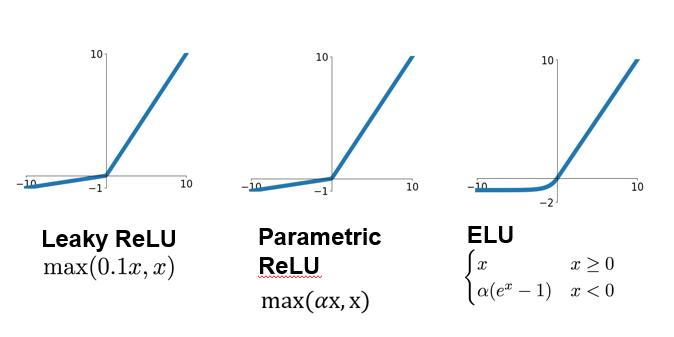

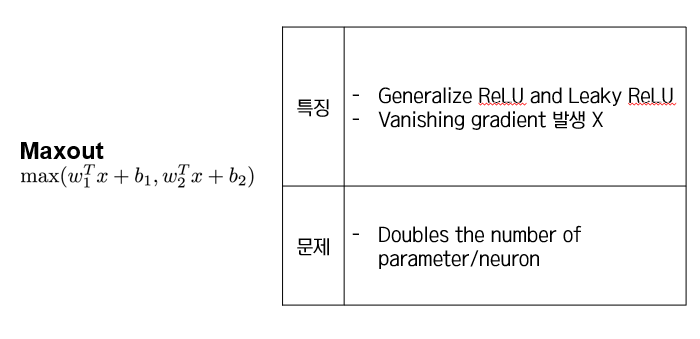

**실전에서는...**
1. 디폴트로 ReLU를 사용하세요  
2. Leaky ReLU/Maxout/ELU 시도해 보세요  
3. tanh는 사용하더라도 기대는 하지 마세요  
4. 시그모이드는 더 이상 사용하지 마세요  

## 2. 데이터 전처리
#### 1) 평균차감(Mean subtraction)
* 데이터의 모든 feature값에 대하여 평균값을 차감하는 방법

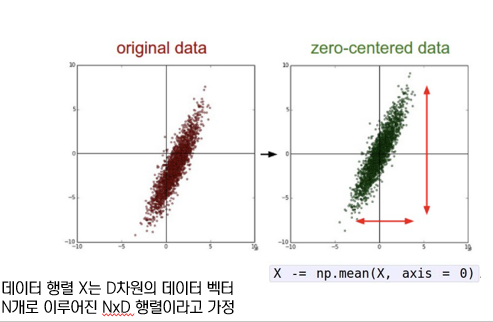

#### 2) 정규화(normalization)

* 각 차원의 데이터가 동일한 범위 내의 값을 갖도록 하는 방법  

**Feature Scaling '스케일을 조정한다'**  
1. Standardization(z-score normalization)  
2. Min-Max normalization  
다만 이미지 데이터에서는 정규화가 필요하지 않다.Zero-centering only!
(라고 강의에는 나오긴 한데, 해당 강의의 과제에서는 이미지 데이터에 대해서도 정규화를 한다...)

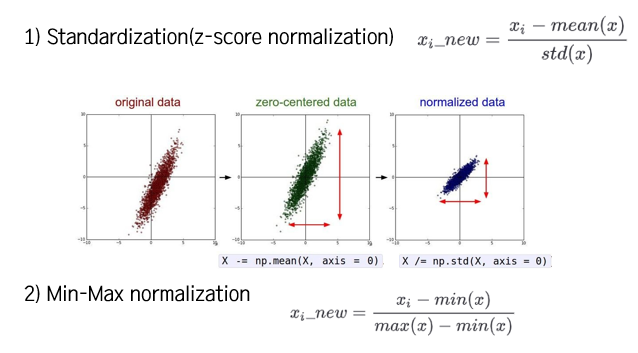

#### 3) PCA와 Whitening

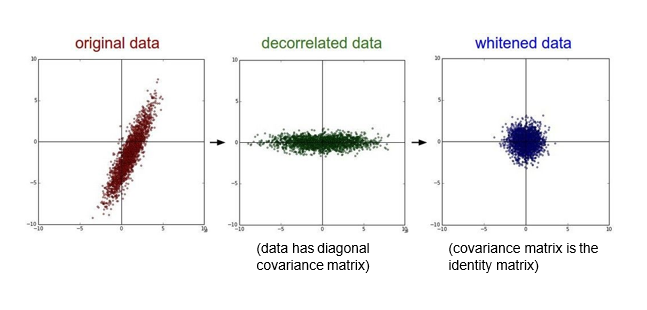

* 머신러닝에서는 pca나 whitening 과 같은 더 복잡한 전처리 과정도 있긴 하지만 이 수업에서 다룰 이미지 데이터에서는 단순히 zero-centering 정도만 사용하고 normalization 이나 그 밖의 복잡한 방법들은 잘 사용하지 읺음

## 3. 가중치 초기화
Q) 가중치의 초기화를 모두 0으로 설정한다면?  
-> 모든 뉴런들이 동일한 연산을 수행함  
-> symmetry breaking이 일어나지 않음  

**가중치 초기화의 기본적인 아이디어**  
**-> 0에 가까운 random number로 초기화**
* 가중치 초기화의 기본적인 idea  
* 정규분포 사용   
* Weight decay: 가중치 매개변수의 값이 작아지도록 학습하는 방법  
		-> 오버피팅을 억제하는 테크닉

* 표준편차가 1인 정규분포로 가중치를 초기화할 경우, 신경망이 깊어지면 문제가 발생 -> vanishing gradient 발생 -> xavier 초기화 방법 등장  

**xavier 초기화 방법**  


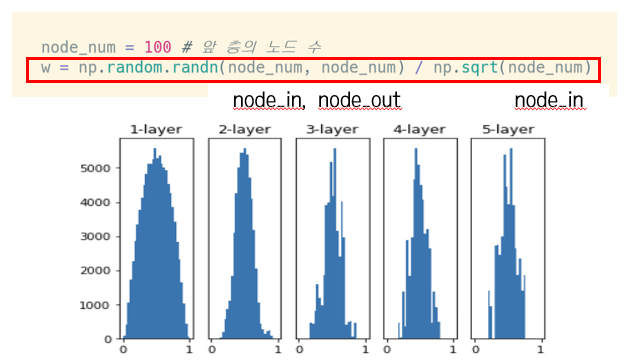

* Xavier 초깃값은 이전 노드와 다음 노드의 개수에 의존하는 방법  
* 이렇게 이전 노드의 개수가 많아지면 그 수로 나눠주기 때문에 결국 weight 값이 작아지고, 반대로 들어오는 이전 뉴런의 개수가 적으면 weight 값은 커짐  
* 입력의 수가 적은 수더라도 큰 가중치와 곱해지기 때문에 히스토그램을 보면 saturation이 발생하지도 않고, 각 층의 활성화 값이 적당히 고루게 분포되어 있는 걸 확인할 수 있음  
* 하지만 xavier 초기값은 활성화 함수가 선형인 것을 전제로 한 결과이기 때문에 active regime 부분에서는 비교적 선형함수라고 볼 수 있는 시그모이드나 하이퍼볼릭 탄젠트 함수에서는 잘 사용이 되지만, 렐루함수를 이용할 때는 문제가 생김 -> He 초기값 등장  

**He 초깃값**  

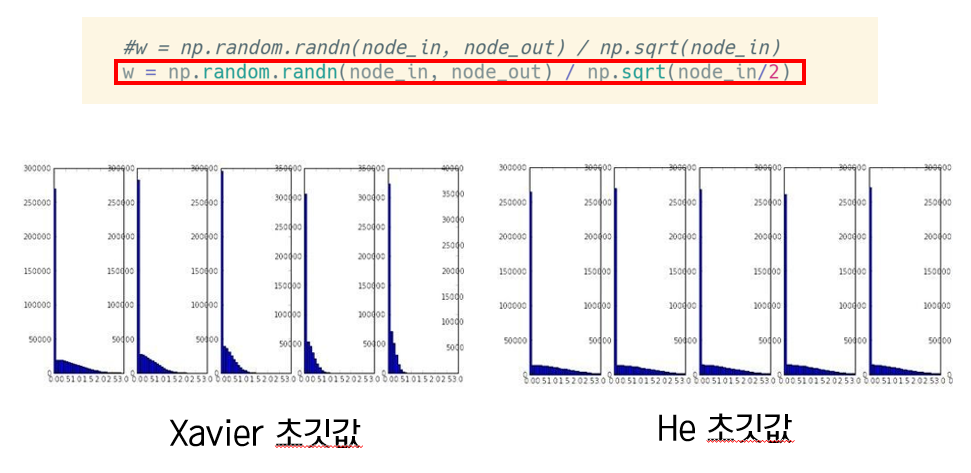

* He 초깃값은 xaiver function에서 표준편차를 루트 2배 해준 것  
* 히스토그램을 보면 xavier 초기값으로 가중치를 초기화한 경우는 층이 깊어지면서 치우침이 조금식 커지는데, he 초깃값을 이용한 경우는 훨씬 균일하게 분포되었고, 층이 깊어져도 분포가 균일한 것이 유지되는 것을 확인할 수 있음  
* 이러한 실험 결과를 바탕으로 활성화 함수로 렐루를 사용할 때는 He 초깃값을, 시그모이드나 하이퍼볼릭 탄젠트와 같은 s자 모양 곡선일 때는 xavier 초깃값을 사용  

## 4. 배치 정규화
* 활성화 값 분포가 적당히 퍼져 있는 것은 학습이 원활하게 수행됨  
* 배치 정규화를 통해 활성화 값 분포를 적당히 퍼트리도록 할 수 있음  
* Mini batch 단위로 정규화를 수행, 정규화 결과 평균은 0, 분산은 1이 됨  
* 활성화 함수의 앞/뒤에 BN Layer을 삽입  

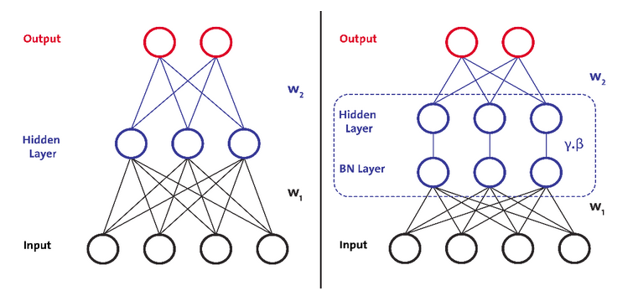

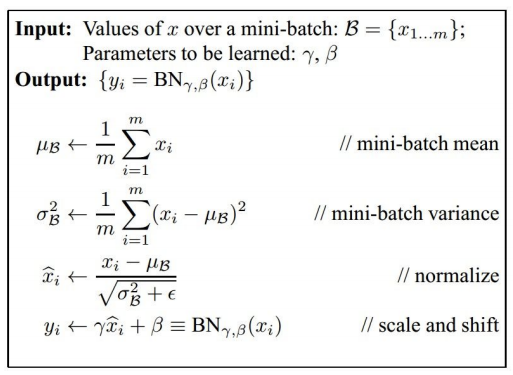

## 5. 하이퍼파라미터 최적화
* cross-validation 전략 - coarse하기 시작해서 나중에 fine tuning하기  
* 처음에는 epoch로 작은 숫자를 줘서 반복을 여러 번 하지 않고, 두번째에 좀 더 running time을 길게 해서 세부적인 hyperparameter search를 시작  

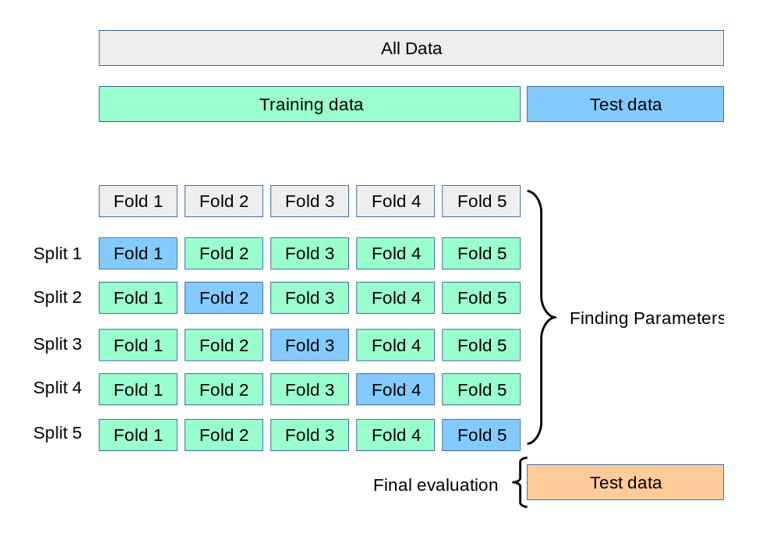

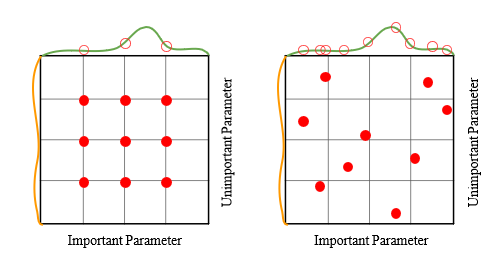

* Hyperparmeter를 구하는 경우에 언제나 radom search의 방법으로!  